# Linear Regression

* Linear regression is a linear model.
* A model that assumes a linear relationship between the input variable (x) and the single output variable (y).
* (y) can be calculated from a linear combination of the input variable (x).
* When there is a single input variable (x), the method is referred to as **simple linear regression**.
* When there are multiple input variable, its often refers to as **multiple linear regression**.
* Input (x) and output (y) are numeric.

In Math, the linear regression line has an equation of the form:

```
y = xw + b
```

where,

* x is the explanatory variable
* y is the dependent variable
* w is the slope of the line
* b is the intercept (the value of y when x = 0)

In [1]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt # Optional, not required for model algorithm

# Import TensorFlow
import tensorflow as tf

## Generate random input data to train on

1. Draw samples from a [uniform distribution](http://mathworld.wolfram.com/UniformDistribution.html) using [Numpy's Random Uniform method](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.uniform.html).

2. In uniform distribution, `size = number of observations (n) * number of variables (k)`

```
input = n * k = 1000 * 1 [here k=1, as we are consider only 1 input (x)]
```

We have create a input data like `1000 * 1` matrix, which means `1` variables problem with `1000` observations.

In [2]:
observations = 1000

"""
1. Here, we are creating 2 input variables (x) and (z) problem with 1000 observations.
"""
x = np.random.uniform(low=-10, high=10, size=(observations, 1))
z = np.random.uniform(low=-10, high=10, size=(observations, 1))

* In our example we have 2 input variables and 1000 observations, thus we need `1000 * 2` matrix.
* We will combine samples (x) and (z) into `1` martix, by using `column_stack` function which takes a sequence of 1D-array and stacks them into a single 2D-array, which results into a matrix of `1000 * 2`.

Notes:

* Dimension are important in linear algebram as we can only multiple matrix that are compatible.
* We want to make sure we can multiple (x) times (w), since our linear model relies on that.
* We have created an input data `1000 * 2`, means `2` variables problems with `1000` observations.

In [3]:
inputs = np.column_stack((x, z))

# Lets know the shape of the input to verify the results
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In supervized learning, below are the elements of the model:

1. Inputs
2. Weights
3. Biases
4. Outputs
5. Targets

**Notes**

* 2 major parameters are `inputs` and `targets`.
* We also need to generate targets.
* Weights, Biases and Outputs varies based on the algorithms.

Consider a targets = `f(x, z) = 2*x - 3*z + 5 + noise`. (*Completely arbitrarily chosen, We can try different functions as well.*)

Conceptually, the algorithm must learn this is the function and the Weights are `2` and `-3`
and the Bias is `5`.

We are introducing noice will make data bit random. Real data always contents noise.

In [4]:
noise = np.random.uniform(low=-1, high=1, size=(observations, 1))

targets = 2*x - 3*z + 5 + noise
# targets = 13*x - 7*z - 12 + noise # Try diff formula values

# Lets verify the shape of target after the x and z are applied
print(targets.shape)

(1000, 1)


## Save n-dim array

Save n-dimensional arrays in `.npz` format using a certain keyword (label) for each array.

In [5]:
np.savez("TF_intro", inputs=inputs, targets=targets)

## Load the data

Load the data using `.npz` file.

In [6]:
training_data = np.load("TF_intro.npz")

In [7]:
input_size = 2 # As we have 2 input variables, (x) and (z)
output_size = 1 # As we have only 1 output (y)

## In TF, actually, we must build the model

In TF,

* `Sequential()` function specifies the model will laid down the stacks layers.
* `Dense()` function perform the dot products of inputs and weights and then add bias.
* `compile(optimizer, loss)` configures the model for training.

1. L2-norm loss = Least sum of squares (least sum of squared error)
2. Scaling by observations = average (mean)

**Verbose parameters**

|Verbose|Purpse|
|:---|:---|
|0|`silent` or no output about the training is displayed.|
|1|shows `progress-bar`| 
|2|shows `one line per epoch`|

**Notes:**

* TF2 is based on Keras.
* `Output = np.dot(inputs, weights) + bias`.
* `sgd` stands for Stochastic Gradient Descent.
* Iteration over the full dataset is called `Epoch`.

**References**

* [Batch vs Stochastic Gradient Descent](https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1)
* [TensorFlow docs for optimizer SDG](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
* [TensorFlow docs for L2-norm loss with scaling by observation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

In [8]:
# Use the defaults TF settings for weights, biases and learning-rate
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer="sgd", loss="mean_squared_error")


"""
Customize and add our own weights, biase and learning-rate
"""
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(
#         output_size,
#         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # weights
#         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # biases
#     )
# ])
# custom_optimizer = tf.keras.optimizer.SDG(learing_rate=0.02)
# model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 559us/sample - loss: 22.9939
Epoch 2/100
1000/1000 [==============================] - 0s 26us/sample - loss: 4.6104
Epoch 3/100
1000/1000 [==============================] - 0s 29us/sample - loss: 1.5218
Epoch 4/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.6684
Epoch 5/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.4394
Epoch 6/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3639
Epoch 7/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3469
Epoch 8/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3465
Epoch 9/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3518
Epoch 10/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3380
Epoch 11/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3459
Epoch 12/100
1000

Epoch 94/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3404
Epoch 95/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3355
Epoch 96/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3453
Epoch 97/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3394
Epoch 98/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3429
Epoch 99/100
1000/1000 [==============================] - 0s 25us/sample - loss: 0.3461
Epoch 100/100
1000/1000 [==============================] - 0s 24us/sample - loss: 0.3451


## Extract the weights and biases

In [9]:
model.layers[0].get_weights()

[array([[ 2.015661 ],
        [-2.9649627]], dtype=float32), array([5.0070972], dtype=float32)]

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.015661 ],
       [-2.9649627]], dtype=float32)

In [11]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0070972], dtype=float32)

## Extract the outputs (make predictions)

Calculate the outputs for given inputs

In [12]:
outputs = model.predict_on_batch(training_data["inputs"])
outputs

<tf.Tensor: id=6818, shape=(1000, 1), dtype=float32, numpy=
array([[ 2.70297852e+01],
       [ 1.29125347e+01],
       [-5.59772205e+00],
       [ 2.80549908e+00],
       [ 6.79835129e+00],
       [ 5.01806183e+01],
       [-1.20855665e+00],
       [-1.94024582e+01],
       [-3.59603958e+01],
       [-5.89531612e+00],
       [ 1.67426186e+01],
       [ 4.61930313e+01],
       [ 1.32593327e+01],
       [-1.54350986e+01],
       [-7.77006817e+00],
       [ 1.18111248e+01],
       [ 1.08541203e+00],
       [ 1.52694626e+01],
       [ 2.24858856e+01],
       [ 7.01818752e+00],
       [ 2.11427555e+01],
       [ 1.60154724e+01],
       [ 2.02413864e+01],
       [-1.60921478e+01],
       [ 4.42741318e+01],
       [-1.18429775e+01],
       [-1.26680489e+01],
       [-2.34591675e+01],
       [ 2.84565029e+01],
       [ 1.66117992e+01],
       [-3.58080292e+01],
       [-1.70950174e+00],
       [-9.48836136e+00],
       [ 3.45021744e+01],
       [ 2.18504086e+01],
       [ 1.67197113e+01],
    

Above values are used to compared to the targets to evaluate the loss function. These are the outputs based on the trained model.

## Lets compare outputs and targets manually

See the outputs and targets are very close to each other.

In [13]:
targets = training_data["targets"]
targets

array([[ 2.77927704e+01],
       [ 1.27340494e+01],
       [-6.32129583e+00],
       [ 2.19035469e+00],
       [ 6.85521768e+00],
       [ 4.94778033e+01],
       [-5.84511457e-01],
       [-1.87241595e+01],
       [-3.54750510e+01],
       [-6.72809320e+00],
       [ 1.79902530e+01],
       [ 4.68371210e+01],
       [ 1.33819079e+01],
       [-1.48855841e+01],
       [-7.90622014e+00],
       [ 1.13127233e+01],
       [ 1.97395646e+00],
       [ 1.58570807e+01],
       [ 2.30744274e+01],
       [ 6.82796828e+00],
       [ 2.23282828e+01],
       [ 1.64204091e+01],
       [ 2.08977447e+01],
       [-1.72743602e+01],
       [ 4.48179279e+01],
       [-1.24014738e+01],
       [-1.27046785e+01],
       [-2.38366501e+01],
       [ 2.89061185e+01],
       [ 1.63174444e+01],
       [-3.62945892e+01],
       [-2.16512641e+00],
       [-8.50571026e+00],
       [ 3.54091841e+01],
       [ 2.23768058e+01],
       [ 1.61933937e+01],
       [ 3.60781335e+01],
       [ 2.32511798e+01],
       [ 8.0

## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closed this plot is to a 45 degree line, the closer target and output values are.

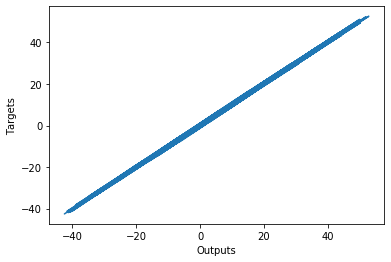

In [14]:
plt.plot(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()